In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# SciKit-Learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [2]:
df = pd.read_csv('Salary_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [4]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


In [6]:
df.shape

(30, 2)

In [7]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [8]:
df = df.rename(columns = {'YearsExperience':'Exp'})

In [9]:
corr_matrix = df.corr()
corr_matrix

,Exp,Salary
Exp,1.000000,0.978242
Salary,0.978242,1.000000


<font size="6" color='pink'>HeatMap</font>

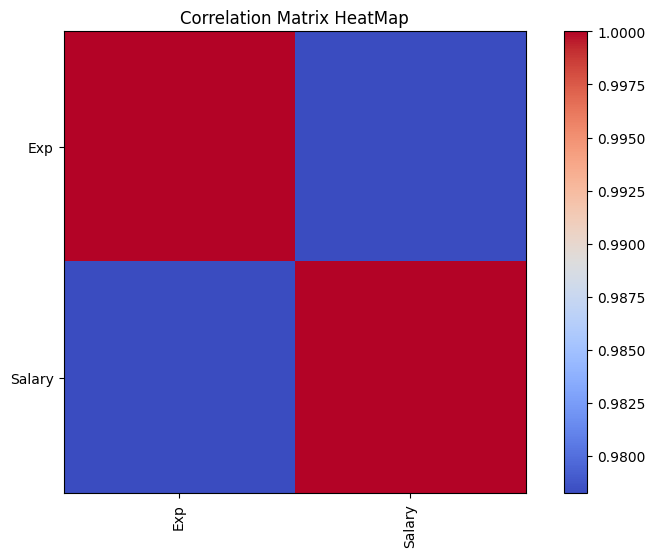

In [10]:
fig, ax = plt.subplots(figsize=(10,6))
cax = ax.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
fig.colorbar(cax)

plt.xticks(rotation=90)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix HeatMap')
plt.show()

<font size="6" color='pink'>Visualization</font>

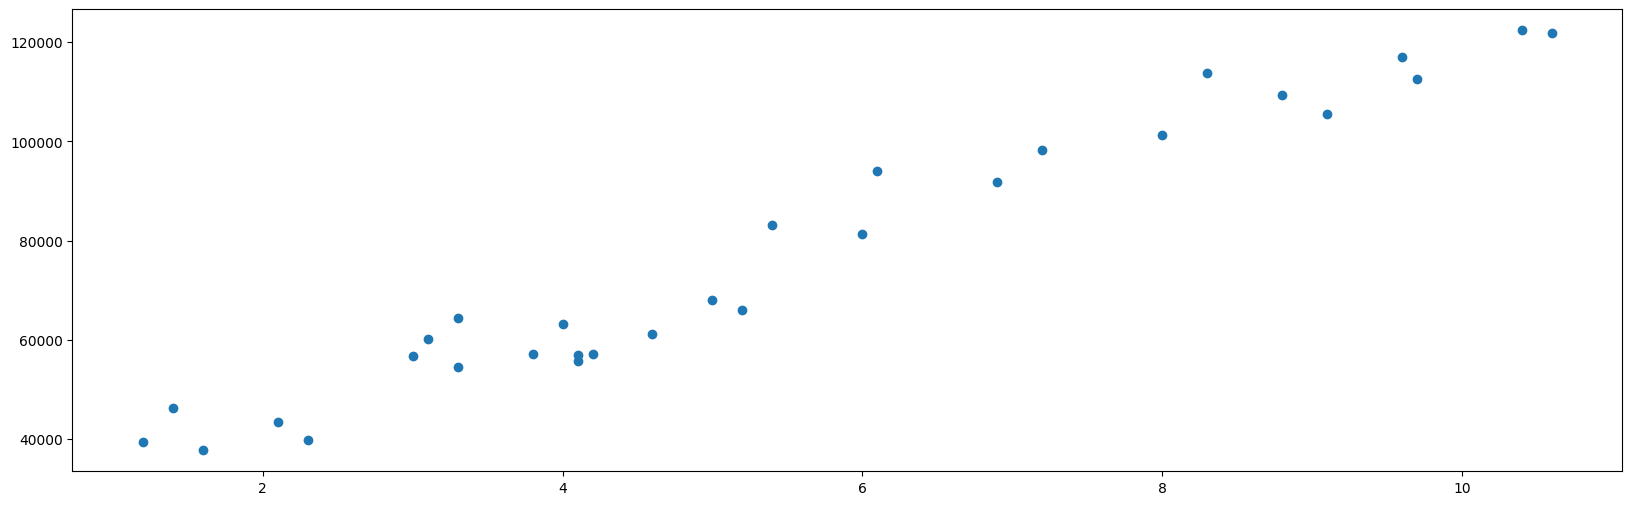

In [11]:
xpoints = df['Exp']
ypoints = df['Salary']
plt.figure(figsize=(20,6))

plt.scatter(xpoints, ypoints)
plt.show()

In [12]:
# Checking for Outliers

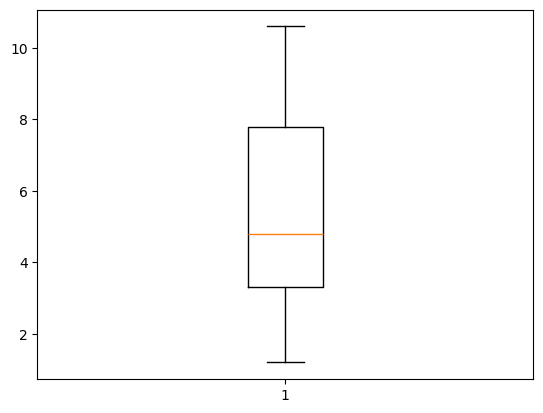

In [13]:
data = df['Exp']
plt.boxplot(data)
plt.show()

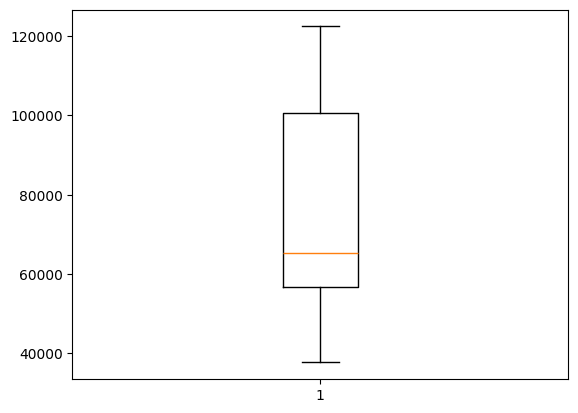

In [14]:
data = df['Salary']
plt.boxplot(data)
plt.show()

<font size="6" color='pink'>Data Splitting</font>

In [23]:
print(type(xpoints))
print(type(ypoints))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [15]:
X = xpoints.values.reshape(-1,1)
y = ypoints.values

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [17]:
print(f'Length of X_train is {len(X_train)}')
print(f'Length of X_test is {len(X_test)}')
print(f'Length of y_train is {len(y_train)}')
print(f'Length of y_test is {len(y_test)}')

Length of X_train is 24
Length of X_test is 6
Length of y_train is 24
Length of y_test is 6


<font size="6" color='pink'>Model Training</font>

In [18]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
len(y_pred)

6

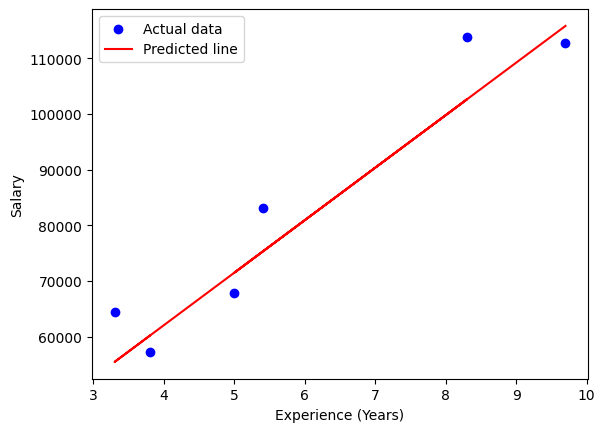

In [20]:
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', label='Predicted line')
plt.xlabel('Experience (Years)')
plt.ylabel('Salary')
plt.legend()
plt.show()

<font size="6" color='pink'>Evaluation</font>

In [21]:
mae = mean_absolute_error(y_test, y_pred)
mae

6286.453830757745

In [22]:
mape = np.mean(np.abs((y_test-y_pred)/y_test))*100
print(f"Error rate is {mape}%")

Error rate is 7.744778459829139%
